In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter as c
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data = pd.read_csv('./Dataset/credit_train.csv')

In [29]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1071.759392,1.399186e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1071.759392,1.399186e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.000000,7.833890e+05,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.000000,4.754370e+05,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.000000,1.289416e+06,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.000000,1.150545e+06,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0


In [4]:
data.shape

(100514, 19)

In [5]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
data[data['Loan ID'].isnull()].index.tolist()

[100000,
 100001,
 100002,
 100003,
 100004,
 100005,
 100006,
 100007,
 100008,
 100009,
 100010,
 100011,
 100012,
 100013,
 100014,
 100015,
 100016,
 100017,
 100018,
 100019,
 100020,
 100021,
 100022,
 100023,
 100024,
 100025,
 100026,
 100027,
 100028,
 100029,
 100030,
 100031,
 100032,
 100033,
 100034,
 100035,
 100036,
 100037,
 100038,
 100039,
 100040,
 100041,
 100042,
 100043,
 100044,
 100045,
 100046,
 100047,
 100048,
 100049,
 100050,
 100051,
 100052,
 100053,
 100054,
 100055,
 100056,
 100057,
 100058,
 100059,
 100060,
 100061,
 100062,
 100063,
 100064,
 100065,
 100066,
 100067,
 100068,
 100069,
 100070,
 100071,
 100072,
 100073,
 100074,
 100075,
 100076,
 100077,
 100078,
 100079,
 100080,
 100081,
 100082,
 100083,
 100084,
 100085,
 100086,
 100087,
 100088,
 100089,
 100090,
 100091,
 100092,
 100093,
 100094,
 100095,
 100096,
 100097,
 100098,
 100099,
 100100,
 100101,
 100102,
 100103,
 100104,
 100105,
 100106,
 100107,
 100108,
 100109,
 100110,
 

In [8]:
data[data['Credit Score'].isnull()].index.tolist()

[1,
 4,
 7,
 11,
 15,
 16,
 18,
 29,
 34,
 38,
 41,
 42,
 52,
 62,
 67,
 68,
 75,
 83,
 90,
 91,
 92,
 94,
 95,
 121,
 124,
 125,
 127,
 131,
 135,
 136,
 137,
 139,
 148,
 178,
 188,
 192,
 193,
 203,
 225,
 226,
 240,
 244,
 252,
 260,
 262,
 273,
 274,
 280,
 284,
 286,
 293,
 300,
 311,
 314,
 316,
 326,
 330,
 333,
 338,
 349,
 356,
 375,
 384,
 390,
 394,
 397,
 400,
 401,
 402,
 405,
 407,
 414,
 416,
 421,
 423,
 424,
 431,
 452,
 455,
 462,
 472,
 477,
 492,
 500,
 501,
 510,
 512,
 513,
 515,
 516,
 520,
 521,
 523,
 525,
 526,
 534,
 538,
 539,
 545,
 555,
 557,
 562,
 566,
 567,
 571,
 572,
 574,
 580,
 582,
 587,
 600,
 603,
 611,
 612,
 614,
 630,
 633,
 638,
 642,
 646,
 649,
 655,
 656,
 661,
 662,
 664,
 665,
 674,
 675,
 682,
 686,
 694,
 697,
 699,
 707,
 709,
 712,
 717,
 718,
 719,
 720,
 724,
 736,
 737,
 740,
 742,
 743,
 746,
 750,
 757,
 758,
 773,
 778,
 797,
 805,
 818,
 828,
 831,
 832,
 835,
 839,
 844,
 845,
 849,
 852,
 854,
 857,
 862,
 864,
 866,
 867,


In [9]:
data[data['Loan ID'].isnull()].index.tolist()

[100000,
 100001,
 100002,
 100003,
 100004,
 100005,
 100006,
 100007,
 100008,
 100009,
 100010,
 100011,
 100012,
 100013,
 100014,
 100015,
 100016,
 100017,
 100018,
 100019,
 100020,
 100021,
 100022,
 100023,
 100024,
 100025,
 100026,
 100027,
 100028,
 100029,
 100030,
 100031,
 100032,
 100033,
 100034,
 100035,
 100036,
 100037,
 100038,
 100039,
 100040,
 100041,
 100042,
 100043,
 100044,
 100045,
 100046,
 100047,
 100048,
 100049,
 100050,
 100051,
 100052,
 100053,
 100054,
 100055,
 100056,
 100057,
 100058,
 100059,
 100060,
 100061,
 100062,
 100063,
 100064,
 100065,
 100066,
 100067,
 100068,
 100069,
 100070,
 100071,
 100072,
 100073,
 100074,
 100075,
 100076,
 100077,
 100078,
 100079,
 100080,
 100081,
 100082,
 100083,
 100084,
 100085,
 100086,
 100087,
 100088,
 100089,
 100090,
 100091,
 100092,
 100093,
 100094,
 100095,
 100096,
 100097,
 100098,
 100099,
 100100,
 100101,
 100102,
 100103,
 100104,
 100105,
 100106,
 100107,
 100108,
 100109,
 100110,
 

In [10]:
nan1 = data[data['Bankruptcies'].isnull()].index.tolist()
len(nan1)

718

In [11]:
data.drop(labels= nan1 , axis= 0 , inplace= True)

In [12]:
data.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)

In [13]:
nan2 = data[data['Years in current job'].isnull()].index.tolist()
len(nan2)

4222

In [14]:
nan3 = data[data['Maximum Open Credit'].isnull()].index.tolist()
len(nan3)

2

In [15]:
data.drop(labels= nan3 , axis= 0 , inplace= True)

In [16]:
data.drop(labels= nan2 , axis= 0 , inplace= True)

C:\Users\SWAROOP\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1000 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

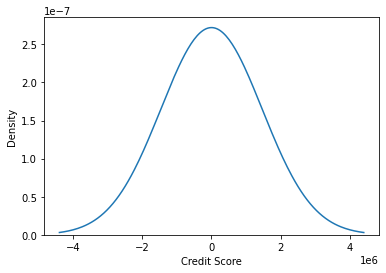

In [17]:
sns.kdeplot(data['Credit Score'] , bw = 1000)

C:\Users\SWAROOP\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 10 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

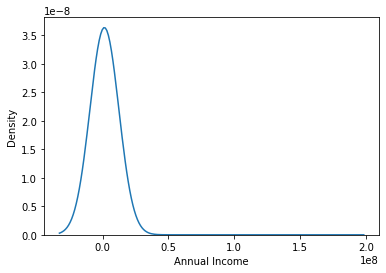

In [18]:
sns.kdeplot(data['Annual Income'] , bw = 10)

In [19]:
data['Credit Score'].mean()

1071.7593922687684

In [20]:
data['Annual Income'].mean()

1399186.3407358518

In [21]:
data['Credit Score'] = data['Credit Score'].fillna(data['Credit Score'].mean())

In [22]:
data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].mean())

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Density'>

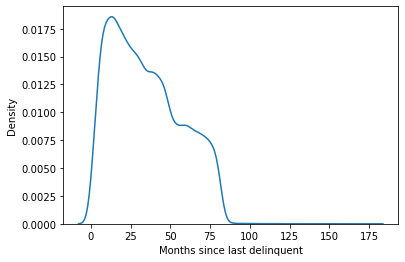

In [23]:
sns.kdeplot(data['Months since last delinquent'] )

In [24]:
# data.loc[data['Months since last delinquent'].isnull(),'Months since last delinquent'] = 240
# data['Months since last delinquent'] = data['Months since last delinquent'] - 240
data['Months since last delinquent'].max()

176.0

ONEHOT ENCODER

In [25]:
data['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [26]:
data['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [28]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House',
       'Business Loan', 'Buy a Car', 'other', 'major_purchase',
       'Take a Trip', 'Other', 'small_business', 'Medical Bills',
       'wedding', 'vacation', 'Educational Expenses', 'moving',
       'renewable_energy'], dtype=object)